# Titanic Kaggle Competition

**Analyst:** Mba Gospel Gift

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone survived

We are going to take the following procedures

    1. Problem Definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation
    
### 1. Problem Definition
      > Given passenger data (ie name, age, gender, socio-economic class, etc), can we predict whether or not, they survived?

### 2. Data
      > Data was downloaded from Kaggle Titanic Competition https://www.kaggle.com/c/titanic/data

### 3. Evaluation
      > If we are able to reach 95% accuracy in our predictions, we will pursue the project

### 4. Features
        **survival:  0 = No, 1 = Yes
        **pclass(Ticket class):**  1st = Upper, 2nd = Middle, 3rd = Lower
        **sibsp:  (number of siblings / spouses aboard the Titanic), The dataset defines family relations in this way...
                    Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife
        **parch:  (number of parents / children aboard the Titanic), The dataset defines family relations in this way...
                    Parent = mother, father, Child = daughter, son, stepdaughter, stepson, Some children travelled only with 
                    a nanny, therefore parch=0 for them.
     

## Preparing the tools we need

In [1]:
# Import all the needed libraries

# common import for basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# we want our plot to appear inside the notebook
%matplotlib inline

# models for scikit-learn and other libraries
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (RandomForestClassifier,
                             AdaBoostClassifier,
                             GradientBoostingClassifier,
                             HistGradientBoostingClassifier,
                             VotingClassifier)
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# inorder to plot pretty graphs
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Load Data

In [2]:
data = pd.read_csv('Titanic_Datasets/train.csv')
data.shape

(891, 12)

## Data Exploration

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Let's find the number of classes in survived column
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

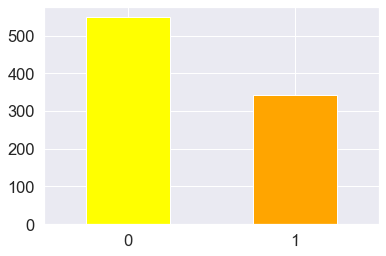

In [36]:
data.Survived.value_counts().plot(kind='bar', color=['yellow', 'orange'])
plt.xticks(rotation=-1);

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
data.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [29]:
# Let's check out missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Sex column

In [37]:
pd.crosstab(data.Survived, data.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


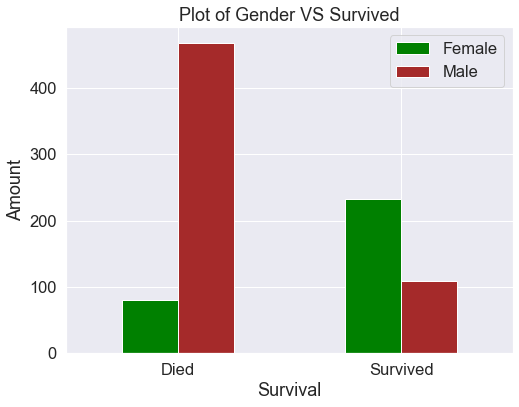

In [123]:
#We could see that many male passengers died. let's take a better view of this
ax = pd.crosstab(data.Survived, data.Sex).plot(kind='bar',
                                          figsize=(8,6), 
                                          color=['green', 'brown'])

# Add some communications
labels = ['Died', 'Survived']
plt.xlabel('Survival')
plt.ylabel('Amount')
plt.title('Plot of Gender VS Survived')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
mpl.axes.Axes.set_xticklabels(ax, labels=labels)
plt.show();



### Dataframe correlation

In [47]:
Let's take at the correlation between 'survived' and other columns
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


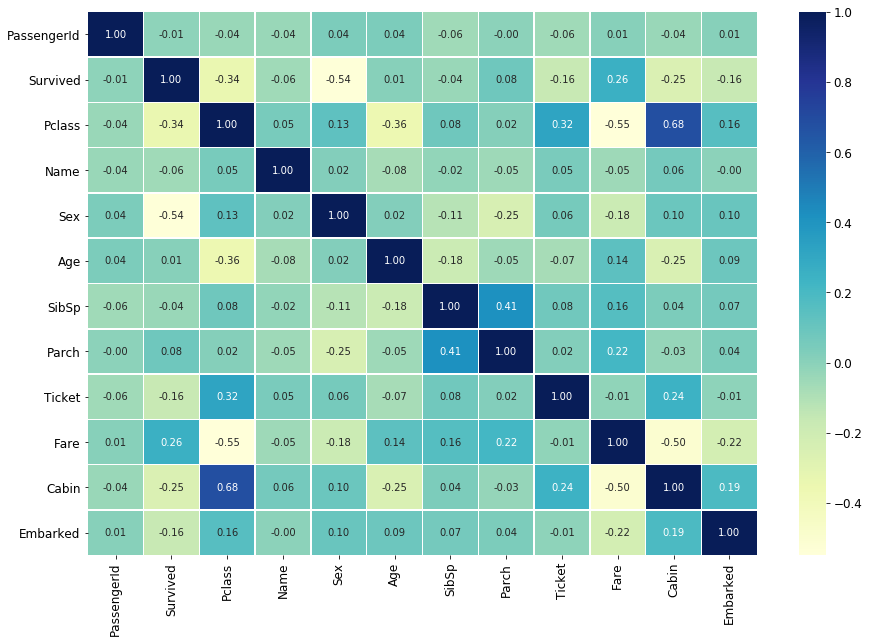

In [26]:
# Let's make it a little prettier
confmat = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confmat,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap='YlGnBu')

From the correlation matrix above, we could infer that parch(number of children/parents) and the fare column, has a positive correlation with our target column

### Parch column

In [61]:
pd.crosstab(data.Survived, data.Parch)

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


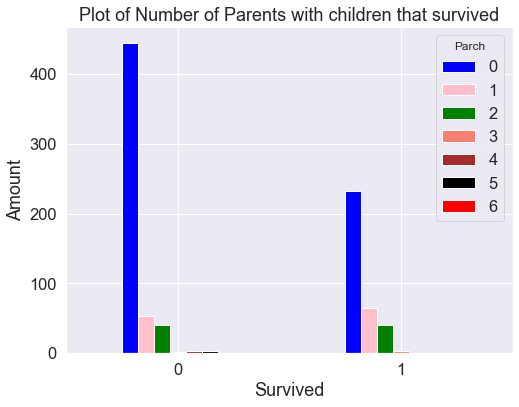

In [118]:
ax = pd.crosstab(data.Survived, data.Parch).plot(kind='bar', 
                                            figsize=(8,6),
                                           color=['blue', 'pink', 'green', 'salmon', 'brown', 'black', 'red'])

plt.title('Plot of Number of Parents with children that survived')
plt.xlabel('Survived')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

From above, we see that, children that traveled with their nannies only had the highest mortality rate, while those with family members survived the highest

### Pclass(Ticket class)

1st = Upper, 2nd = Middle, 3rd = Lower) column

In [62]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [63]:
pd.crosstab(data.Survived, data.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


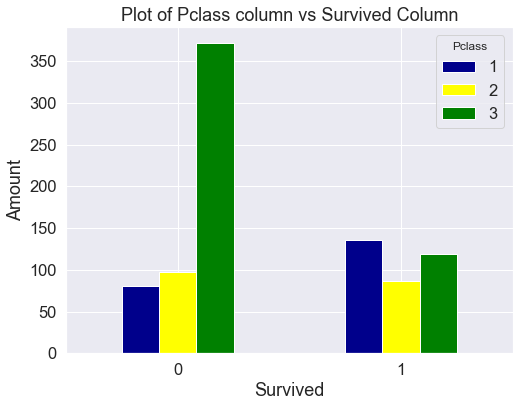

In [117]:
ax = pd.crosstab(data.Survived, data.Pclass).plot(kind='bar',
                                                 figsize=(8, 6),
                                                 color=['darkblue', 'yellow', 'green'])

plt.title('Plot of Pclass column vs Survived Column')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show();

We could infer that lower ticket class had the highest mortality rate followed by the 2nd ticket class

### Embarked column

Port of Embarkation

C = Cherbourg, Q = Queenstown, S = Southampton

In [67]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
pd.crosstab(data.Survived, data.Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


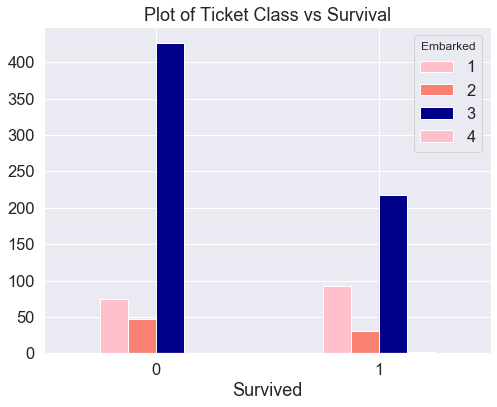

In [116]:
ax = pd.crosstab(data.Survived, data.Embarked).plot(kind='bar',
                color=['pink', 'salmon', 'darkblue'],
                figsize=(8, 6))

plt.xlabel('Survived')
plt.xticks(rotation=0)
plt.title("Plot of Ticket Class vs Survival")
plt.show();


We could infer that, people that embarked from Southampton had the highest mortality rate, followed by people that embarked from Cherbourg

# Preprocessing our dataset

First, we will fill missing valued,
then, Scale our numeric columns,
lastly, we will convert our categorical columns to numerical

In [72]:
# Let's take a look at the column with missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Let's fill the Age column missing values with 0
data['Age'].fillna(0.0, inplace=True)

# Let's fill the cabin column missing values with 'missing'
data['Cabin'].fillna('missing', inplace=True)

# Let's fill the Embarked column missing values with 'missing'
data['Embarked'].fillna('missing', inplace=True)

In [76]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
# Next Let's convert categorical columns to numerical
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


 I would have really loved to one-hot encode the categorical columns, but they are really much, so, i will use pandas low-level api to label encode

In [84]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  100 non-null    int64   
 1   Survived     100 non-null    int64   
 2   Pclass       100 non-null    int64   
 3   Name         100 non-null    category
 4   Sex          100 non-null    category
 5   Age          100 non-null    float64 
 6   SibSp        100 non-null    int64   
 7   Parch        100 non-null    int64   
 8   Ticket       100 non-null    category
 9   Fare         100 non-null    float64 
 10  Cabin        100 non-null    category
 11  Embarked     100 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 16.2 KB


In [8]:
# Firstly, turn them into categorical values
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [9]:
# This converts them to numerical
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = pd.Categorical(content).codes + 1

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


# Modelling

In [11]:
# let's split our data into features and label
np.random.seed(42)
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [12]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)


In [90]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((712, 11), (179, 11), (712,), (179,))

In [25]:
# Let's create a function to train our models
# Put the models in a dictionary
models = {'rfc':RandomForestClassifier(random_state=42, verbose=0),
         'adb': AdaBoostClassifier(random_state=42),
         'gbc': GradientBoostingClassifier(random_state=42, verbose=0),
         'hgb': HistGradientBoostingClassifier(random_state=42, verbose=0),
         'lgbm': LGBMClassifier(verbose=0),
         'cbc': CatBoostClassifier(verbose=None),
         'vc': VotingClassifier(voting = 'soft', estimators=[('rfc', RandomForestClassifier(random_state=42, verbose=0)),
                                  ('adb', AdaBoostClassifier(random_state=42)),
                                  ('gbc', GradientBoostingClassifier(random_state=42, verbose=0)),
                                    ('hgb', HistGradientBoostingClassifier(random_state=42, verbose=0)),
                                   ('lgbm', LGBMClassifier(verbose=0)),
                                ('cbc', CatBoostClassifier(verbose=None))])}

def train_model(models, X_train, X_valid, y_train, y_valid):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_valid : valid data (no labels)
    y_train : training labels
    y_valid : valid labels
    """
      
    #Set random_seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through the model and fit the model to the data
    for name, model in models.items():
        model.fit(X_train, y_train)
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_valid, y_valid)
    return model_scores
        

## **I am commenting the next line for the purpose of printing this notebook

In [22]:
# model_scores = train_model(models = models, X_train= X_train, X_valid = X_valid,
#                           y_train = y_train, y_valid = y_valid)

In [21]:
model_scores

{'rfc': 0.8324022346368715,
 'adb': 0.7877094972067039,
 'gbc': 0.8156424581005587,
 'hgb': 0.8100558659217877,
 'lgbm': 0.8212290502793296,
 'cbc': 0.8491620111731844,
 'vc': 0.8268156424581006}

In [99]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,rfc,adb,gbc,hgb,lgbm,cbc,log_reg,vc
accuracy,0.832402,0.787709,0.815642,0.810056,0.821229,0.849162,0.73743,0.821229


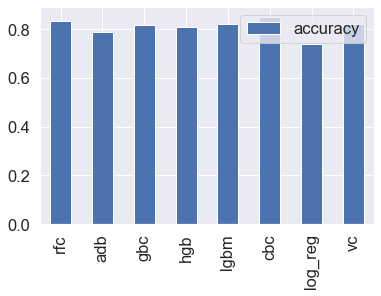

In [125]:
model_compare.T.plot.bar();

I am not satisfied with our result, let's try some hyperparameter tuning

## Hyperparameter tuning with RandomizedCV

In [29]:
#create a hyperparameter grid for Random Forest
gs_rs = {'n_estimators': np.arange(10,1000,10),
        'max_features': ('auto', 'log2'),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2)}
# create a hyperparameter grid for 
gs_cb = {'grow_policy': ('symmetricTree', 'Depthwise', 'losswise'),
        'border_count': np.arange(10,250,10),
        'bagging_temperature': np.arange(0,11,2)}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
rscv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                      param_distributions= gs_rs,
                      n_iter = 50,
                      cv = 5,
                      verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  6.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [32]:
rscv_rf.score(X_valid, y_valid)

0.8547486033519553

In [126]:
# # for CatBoost
# rscv_cb = RandomizedSearchCV(CatBoostClassifier(),
#                             param_distributions=gs_cb,
#                             cv = 5,
#                             n_iter=50,
#                             verbose=True)

# rscv_cb.fit(X_train, y_train)

RandomForest performed better after hyperparameter tuning

In [34]:
# Let's confusion matrix to see our predictions
from sklearn.metrics import confusion_matrix

y_preds = rscv_rf.predict(X_valid)

print(confusion_matrix(y_valid, y_preds))


[[95 10]
 [16 58]]


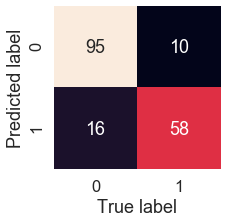

In [35]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
        
plot_conf_mat(y_valid, y_preds)